In [1]:
import ROOT

# for creating a responsive plot
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
infile = '/Users/yuntse/data/coherent/preLArTPC/geant4/nueArCCSignal/nueArCC_sns_yDir_g4_00.root'

In [3]:
df = pd.DataFrame(ROOT.RDataFrame("edep", infile).AsNumpy())

In [4]:
df

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
0,0.003206,249.473938,-137.999022,-108.570852,0,0,22,0.029818,249.870874,-134.836050,-108.691097,5
1,0.026611,249.474142,-138.002589,-108.572582,0,5,11,0.537610,249.473938,-137.999022,-108.570852,6
2,0.000000,300.000000,-205.218492,-59.207864,0,0,22,2.716056,249.870874,-134.836050,-108.691097,4
3,0.000000,357.477017,-285.917543,-2.471413,0,0,22,2.716056,300.000000,-205.218492,-59.207864,4
4,0.000000,359.131160,-287.445316,0.926159,0,0,22,1.677215,357.477017,-285.917543,-2.471413,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1466338,0.000000,-458.463295,-37.568693,160.238065,9999,2,22,1.169300,-300.000000,-29.872608,145.831510,17
1466339,0.000000,-29830.261321,-1464.068418,2830.549981,9999,2,22,1.169300,-458.463295,-37.568693,160.238065,17
1466340,0.000000,-185.963264,250.000000,139.053086,9999,0,12,32.388343,-185.963264,-24.096118,139.053086,1
1466341,0.000000,-185.963264,420.734672,139.053086,9999,0,12,32.388343,-185.963264,250.000000,139.053086,1


In [5]:
detector_bounds = [[-30, 30], [-25, 25], [-30, 30]] # cm (x, y, z)
def draw_boundaries(ax):
    """
    Draw the detector boundaries as a wireframe
    not needed, but pretty
    """
    boundKwargs = {'color': 'black',
                   'ls': '--'}
    
    ax.plot([detector_bounds[0][0], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][0]],
            [detector_bounds[2][0], detector_bounds[2][0]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][1]],
            [detector_bounds[1][1], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][0]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][0]],
            [detector_bounds[2][1], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][1]],
            [detector_bounds[1][1], detector_bounds[1][1]],
            [detector_bounds[2][1], detector_bounds[2][1]],
            **boundKwargs)

    ax.plot([detector_bounds[0][0], detector_bounds[0][0]],
            [detector_bounds[1][0], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][0]],
            **boundKwargs)
    ax.plot([detector_bounds[0][1], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][0]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][0]],
            [detector_bounds[1][0], detector_bounds[1][1]],
            [detector_bounds[2][1], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][1], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][1]],
            [detector_bounds[2][1], detector_bounds[2][1]],
            **boundKwargs)

    ax.plot([detector_bounds[0][0], detector_bounds[0][0]],
            [detector_bounds[1][0], detector_bounds[1][0]],
            [detector_bounds[2][0], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][0], detector_bounds[0][0]],
            [detector_bounds[1][1], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][1], detector_bounds[0][1]],
            [detector_bounds[1][0], detector_bounds[1][0]],
            [detector_bounds[2][0], detector_bounds[2][1]],
            **boundKwargs)
    ax.plot([detector_bounds[0][1], detector_bounds[0][1]],
            [detector_bounds[1][1], detector_bounds[1][1]],
            [detector_bounds[2][0], detector_bounds[2][1]],
            **boundKwargs)

    return ax

In [6]:
iEvt = 0
Event = df[df.event == iEvt]
trackList = Event.trackID.unique()
visTrackList = Event[~Event.pdg.isin((12, 22, 2112))].trackID.unique()
primaryE = Event[(Event.motherID==0)&(Event.pdg==11)].trackID.unique()[0]
EvtMax = Event[~Event.pdg.isin((12, 22, 2112))]['dE'].max()
EvtMax, primaryE

(4.761825694149715, 2)

In [7]:
Event[Event.trackID==primaryE].startE

52    29.476707
53    24.032829
54    23.736714
55    18.974888
56    17.040167
57    15.734548
58    14.926647
59    11.520906
60     9.998148
61     7.987207
62     6.160158
63     4.093900
64     3.294746
65     2.641031
66     2.069608
67     1.632951
68     1.192167
69     0.837255
Name: startE, dtype: float64

In [8]:
Event[Event.trackID==primaryE].startE.idxmax()

52

In [9]:
Event.loc[52]

dE            4.746427
endX        265.468470
endY       -119.808069
endZ       -118.985996
event         0.000000
motherID      0.000000
pdg          11.000000
startE       29.476707
startX      249.870874
startY     -134.836050
startZ     -108.691097
trackID       2.000000
Name: 52, dtype: float64

In [10]:
iFirstPrimaryE = Event[Event.trackID==primaryE].startE.idxmax()
firstPrimaryE = Event.loc[iFirstPrimaryE]
vertex = np.array([ firstPrimaryE.startX, firstPrimaryE.startY, firstPrimaryE.startZ ])
vertex

array([ 249.87087445, -134.83604984, -108.69109735])

(-31.0, 31.0)

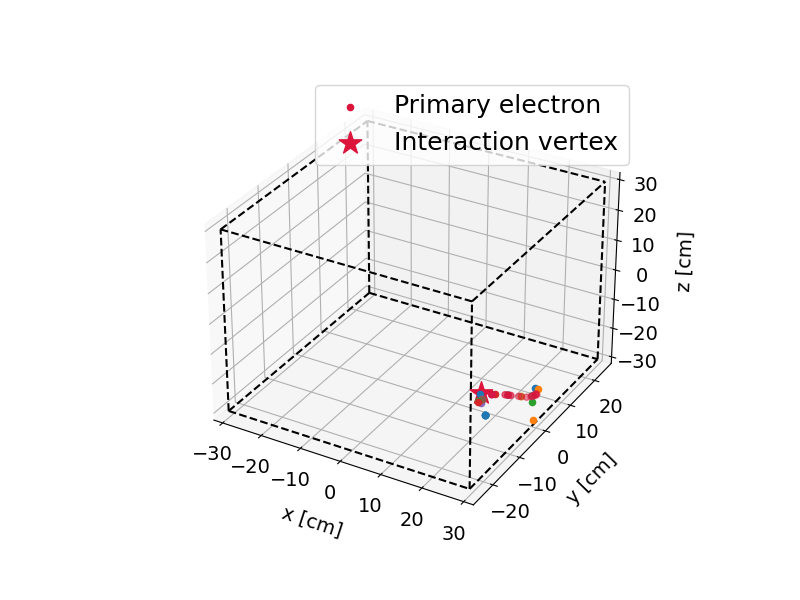

In [16]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')
 
for t in visTrackList:
    if t == primaryE:
        ax.scatter( Event[(Event.trackID==t)]['startX']/10,
                    Event[(Event.trackID==t)]['startY']/10,
                    Event[(Event.trackID==t)]['startZ']/10,
                    # s = Event[(Event.trackID==t)]['dE']/EvtMax * 14**2,
                    c = [ '#DC143C' ],
                    label = 'Primary electron'
                   )
    else:
        ax.scatter( Event[(Event.trackID==t)]['startX']/10,
                    Event[(Event.trackID==t)]['startY']/10,
                    Event[(Event.trackID==t)]['startZ']/10,
                    # s = Event[(Event.trackID==t)]['dE']/EvtMax * 14**2
                  )
ax.scatter( vertex[0]/10, vertex[1]/10, vertex[2]/10, s = 288, c = '#DC143C', label = 'Interaction vertex', marker = '*' )
draw_boundaries(ax)
ax.set_xlabel('x [cm]', fontsize = 14, labelpad = 10)
ax.set_ylabel('y [cm]', fontsize = 14, labelpad = 10)
ax.set_zlabel('z [cm]', fontsize = 14, labelpad = 10)
ax.tick_params( axis = 'x', labelsize = 14 )
ax.tick_params( axis = 'y', labelsize = 14 )
ax.tick_params( axis = 'z', labelsize = 14 )
ax.legend( fontsize = 18 )
ax.set_xlim( [-31, 31])
ax.set_ylim( [-26, 26])
ax.set_zlim( [-31, 31])